In [23]:
# This program implements a moving average strategy
# using daily price movements for 254 trading days (~ 1 calendar year)
#
import random
import numpy as np
import math

In [51]:
# Initialize a vector of zeroes nran = 100
Totalpaths = 10
Nstep = 254 # Number of trading days (1 year = 254 trading days)
nran = Nstep * Totalpaths
#
# Initialize the r_draw array with zeros
r_draw = np.zeros(nran, dtype='float')
#
print(r_draw[1])
#
np.random.seed(91)
#
for x in range(nran):
    r_draw[x] = np.random.normal(loc=0, scale=1)
    # r_draw[x] = np.random.normal(loc=0, scale=1, size=None)
#
# Created an array of size nran. Note that indexing is from 0 to nran-1
print(r_draw[nran - 1])
print(r_draw)

0.0
-0.5009408664531259
[-0.60612102 -1.05993975 -0.55091967 ... -1.90191447 -0.31665897
 -0.50094087]


In [39]:
# Define a series of price data
# store in an array (NDAYS X NYEARS)

# Prices sampled at end of trading day
# DeltaT in years = 1/254
#
S0=100
T = 1
Sigma = 0.2
r = 0.05
drift=0.05
DeltaT=T/Nstep
print('DeltaT', DeltaT)
stockp=np.zeros(nran, dtype="float").reshape(Nstep,Totalpaths)
#
# Note that the index starts at zero, not one
npath=0
S=S0
for x in range(0,nran):
    Snew=S*math.exp(((drift*DeltaT)+(Sigma*(DeltaT**0.5)*r_draw[x])))
    step = x %254
    if step == 253:
        if npath < Totalpaths:
            # print 'npath', npath, step, x, Totalpaths
            stockp[step, npath]=Snew
            npath=npath+1
            print('npath', npath)
        S=S0
    else:
        S=Snew
        stockp[step, npath]=Snew
# Check if the program exits at the last x
print('x', x)
print(stockp[253,0])
# Show histogram
print(stockp)

DeltaT 0.003937007874015748
npath 1
npath 2
npath 3
npath 4
npath 5
npath 6
npath 7
npath 8
npath 9
npath 10
x 2539
123.1103901975257
[[100.90113234 100.00761003  97.6083521  ...  97.63436667  99.50621783
   99.06796431]
 [102.22137774 100.33489206  98.71686304 ...  98.12831574 100.94348631
  100.58360377]
 [102.11768059 103.96127183  98.83619532 ...  98.72914116 102.74928844
  101.204506  ]
 ...
 [123.28108718 133.3516744   85.6873667  ... 101.79666265 125.00588551
  139.20695794]
 [124.20408836 131.74962837  84.71049277 ... 102.56058472 125.58009991
  141.69261484]
 [123.1103902  129.15822776  84.74258567 ... 103.61565697 128.72460148
  141.16600858]]


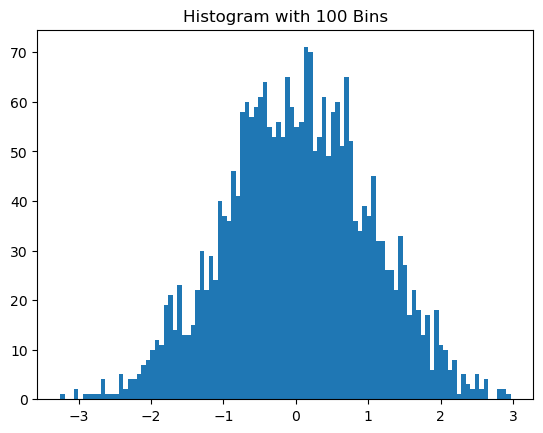

In [27]:
import matplotlib.pyplot as plt
# Plotting the histogram for r_draw
_ = plt.hist(r_draw, bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with 100 Bins")
plt.show()

In [55]:
# Trading Environment
# Define Short-term and Long-term moving averages
ltavg=np.zeros(Nstep, dtype='float')
stavg=np.zeros(Nstep, dtype='float')
S=S0
pnl=0
long=0
short=0
mavg=0
signal=np.zeros(254, dtype='int')
last=0
#
#for x in range(0,0):
    #    print("x",x)
#
# Calculate the averages
#
x=0
for y in range(0,Nstep):
    if y == 0:
        ltavg[y]=S0
        stavg[y]=S0
        #print('y',y)
    if y < 25:
        ltavg[y]=ltavg[y-1]+stockp[y,x]
    else:
        ltavg[y]=ltavg[y-1]+stockp[y,x]-stockp[y-25,x]
    if y < 10:
        stavg[y]=stavg[y-1]+stockp[y,x]
    else:
        stavg[y]=stavg[y-1]+stockp[y,x]-stockp[y-10,x]
for y in range(0,Nstep):
    stavg[y]=stavg[y]/10
    ltavg[y]=ltavg[y]/25
    #print ('Averages',y,stavg[y],ltavg[y])
pos=0
trade=np.zeros(254, dtype='int')
last=0
for y in range(25,Nstep):
    if stavg[y] > ltavg[y]:
        if last==0:
            trade[y]=1
            last=1
    if stavg[y] < ltavg[y]:
        if last==1:
            trade[y]=-1
            last=0
    if y==253:
        if last==1:
            trade[y]=-1
            last=0
PandL=np.zeros(254, dtype='int')
BHRet=0
Num_Buys=0
Num_Sells=0
for y in range(25,Nstep):
    if trade[y]==1:
        if BHRet == 0:
            BHRet=stockp[y,x]
        PandL[y]=PandL[y-1]+stockp[y,x]
        Num_Buys=Num_Buys+1
    if trade[y]==-1:
        PandL[y]=PandL[y-1]+stockp[y,x]
        Num_Sells=Num_Sells+1
    if trade[y]==0:
        PandL[y]=PandL[y-1]
    if y == 253:
        #print(y, x, stockp[y,x],BHRet)
        BHRet=BHRet+stockp[y,x]
#print(PandL)
print('Buy-Hold Return', BHRet)
print('Mavg Ret', PandL[253])
print('Number of Buys', Num_Buys)
print('Number of Sells', Num_Sells)

Buy-Hold Return 2.3096460097749647
Mavg Ret 10
Number of Buys 5
Number of Sells 5
